In [1]:
## faire les imports et installer skimage
import skimage
import time
import numpy as np
import os
## exemple de traitement avec une image de la dataset : change le path si tu veux tester
filename = os.path.join(skimage.data_dir, '/Users/raphael/Desktop/workspace/2A/IMA/ima206/projet/Dataset/city_1.jpg')
from skimage import io
canon = io.imread(filename)

In [2]:
##test1
type(canon)

numpy.ndarray

In [3]:
## test2
(canon.shape)[0:2]

(600, 400)

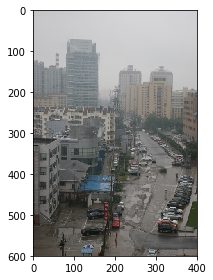

In [4]:
## display
io.imshow(canon)
io.show()


In [5]:
## fonction minimum sur chaque canal
def min_canal(I):
    n,p = I.shape[0:2]
    im_res = np.ones((n,p),dtype = np.uint8)
    
    for i in range(n):
        for j in range(p):
            im_res[i][j] = int(min(I[i][j]))
    
    return(im_res)
    

2.5185391902923584


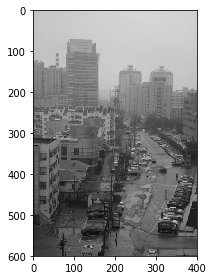

In [6]:
t0 = time.time()
io.imshow(min_canal(canon))
t1 = time.time()-t0
print(t1)
io.show()

In [7]:
#fonction minimum par patch de taille 15*15
def min_Patch(I):
    n,p = I.shape[0:2]
    im_res = np.ones((n,p),dtype = np.uint8)
    for i in range (n):
        for j in range (p):
            mini = I[i,j]
            ## les fonctions max,min permettent d'éviter les effets de bords
            for k in range (max(i-7,0),min(i+7,n)):
                for l in range (max(j-7,0),min(j+7,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini
    return(im_res)
                
    

In [8]:
## test
min_Patch(min_canal(canon))

array([[193, 193, 193, ..., 207, 207, 207],
       [193, 193, 193, ..., 207, 207, 207],
       [192, 192, 192, ..., 207, 207, 207],
       ..., 
       [ 43,  43,  43, ...,  23,  23,  23],
       [ 43,  43,  43, ...,  23,  23,  23],
       [ 43,  43,  43, ...,  23,  23,  23]], dtype=uint8)

### Remarques
J'ai testé le temps de calcul du dark channel. C'est long : 1m10s!! Il y a quelque chose a optimiser, probablement le fait que j'utilise des boucles, mais je ne vois pas trop comment faire autrement pour faire un parcours de patch. Cela dit, le resultat obtenu a l'air correct, ca ressemble beaucoup a ce qu'on pouvait trouver dans l'article.

61.529470920562744


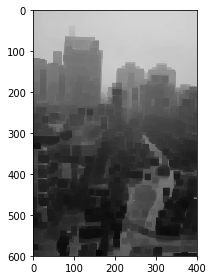

In [9]:
t0 = time.time()
darkchannel = min_Patch(min_canal(canon))
io.imshow(darkchannel)
t1 = time.time()-t0
print(t1)
io.show()

In [10]:
## definition de la fonction dark_channel
def dark_channel(I):
    return(min_Patch(min_canal(I)))

### Remarques
L'idée de la fonction ci-dessous c'est de sélectionner les valeurs des 0,1% pixels les plus clairs ainsi que leur coordonnées, comme on le souhaite dans l'article. Pour ça j'ai pensé de créer une nouvelle matrice qui a pour élément la valeur du pixel et ses coordonnées. L'idée est de trier ensuite cette liste selon les valeurs du pixels et de ne selectionner que les 0,1% des pixels(valeurs+coordonnées) les plus lumineux. Ensuite parmi ces pixels il est facile de refaire un quicksort sur chacun des canaux car on a les coordonnées. C'est ce qu'on souhaite faire pour trouver les 1% les plus lumineux par canaux et trouver les Ac. Malheureusement ça ne marche pas et je ne sais pas encore pourquoi.

In [11]:
## implementation partielle du calcul de la lumiere athmospherique
def At_light(I):
    n,p = I.shape[0:2]
    I_dark = dark_channel(I)
    res = np.ones((n,p,3),dtype = np.uint16)
    for i in range(n):
        for j in range(p):
            res[i,j,0] = I_dark[i,j]
            res[i,j,1] = i
            res[i,j,2] = j
            
            
    I_sorted = np.sort(res, axis=0)
    length = I_sorted.shape[0]
    print(length)
    I_thresh = I_sorted[int(0.999*length):length,:,:]
    
    return(I_thresh)

In [12]:
a = At_light(canon)

600
